## Exercise 4: Quantum Noise

Take the program from exercise 3, and modify it to run your circuit on a real quantum computer.

Your results between exercise 3 and 4 should be different, even though the circuit is identical. It’s up to you to understand why.

From there, we strongly advise you to go back to what you have done,
and understand the applied math/vector formulas behind each action,
and test the different existing gates.

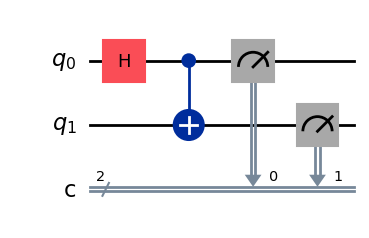

In [1]:
from qiskit import QuantumCircuit

# Create Circuit
qc = QuantumCircuit(2, 2) # 2 qubits, 2 classical bits
qc.h(0)  # Hadamard gate on qubit 0
qc.cx(0, 1) # CNOT gate from qubit 0 to qubit 1
qc.measure(range(2), range(2))  # Measure both qubits

qc.draw(output='mpl')  # Draw the circuit

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_distribution
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Initialize account.
service = QiskitRuntimeService()

# Prepare inputs.
psi = RealAmplitudes(num_qubits=2, reps=2)
H1 = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])
theta = [0, 1, 1, 2, 3, 5]

# Backend and pass manager.
backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(target=backend.target, optimization_level=1)

# Transpile the circuits using the pass manager.
new_isa_circuit = pm.run(qc)
psi_isa_circuit = pm.run(psi)
isa_observables = H1.apply_layout(psi_isa_circuit.layout)

# Submit the circuits to the IBM Runtime service.
with Session(backend=backend) as session:
    # Submit a request to the Sampler primitive within the session.
    sampler = Sampler(mode=session)
    job = sampler.run([new_isa_circuit])
    pub_result = job.result()[0]
    print(f"Counts: {pub_result.data.c.get_counts()}")

Counts: {'11': 2005, '00': 1664, '10': 243, '01': 184}


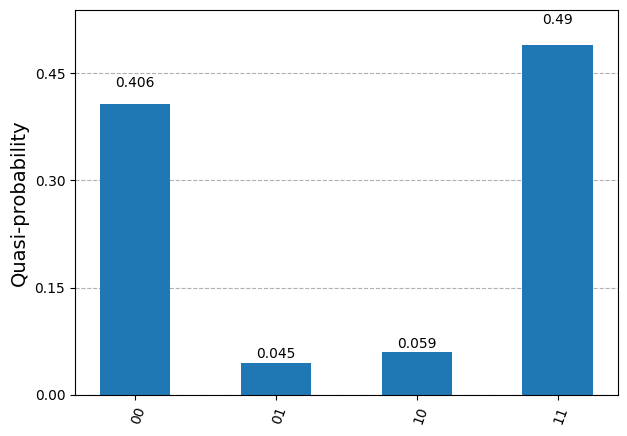

In [3]:
plot_distribution(pub_result.data.c.get_counts())